## KING COUNTY HOUSE PRICE PREDICTION

## Final Project Submission

Please fill out: GROUP 5
* Student name: Prudence Coredo, Titus Mutuku, Gloria Nyongesa, Candy  Gudda, Eric Lintari, Sadi Kiri
* Student pace:full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Overview
This project leverages the King County House Sales dataset to perform a comprehensive analysis of house sales in a Northwest county using multiple linear regression modeling. Our primary aim is to empower local real estate agencies with the insights required to address inquiries, particularly from homeowners. We seek to identify the pivotal factors that significantly impact house prices and quantify the extent of their influence on property values and potential appreciation.

# Business Understanding
To identify how house prices are affected by various factors and to provide a guide on how to best identify properties that bear a high resell value for to maximize on profit margins.

# Background 
King County has witnessed a vibrant real estate market.The housing market in this county is competitive, and homeowners looking to buy or sell properties frequently seek guidance from local real estate agencies. One common concern among homeowners is the potential value added by home renovations. This project aims to provide data-driven insights into this issue, helping homeowners make informed decisions on their properties. The King County House Sales dataset serves as a valuable resource for this analysis.

## Data Exploration/Understanding
- This dataset contains house sales prices for King County. It includes homes sold between May 2014 and May 2015.
- The dependent Variable: Sales Price / Selling Price
- The predictors: the sale date, renovation year, number of bedrooms and bathrooms, number of floors, the square footage of the   houses (both living and lot), and available view of waterfront. Also, the dataset contains the grade and condition of each       house.
- Datatypes: All are integers or Float except the  date and sqft_basement (object).
- Distribution of our data:
   - continuous: sqft_living, sqft_lot, sqft_above, sqft_basement (after adjustment), gap year between sold and built/renovated
   - discrete: bedrooms, bathrooms, grade, floors, condition
   - categorical: waterfront
- Our datasets contain 21,597 items of house sale information
- We will eliminate the information such as house ID, zipcode, latitude and longitude, and whether the house has been viewed or not.

### Importing Libraries

#### Importing the relevant modules and the dataset

In [180]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset using pandas

In [181]:
# Loading the data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000000,3,1.000000,1180,5650,1.000000,NaN,NONE,...,7 Average,1180,0.0,1955,0.000000,98178,47.511200,-122.257000,1340,5650
1,6414100192,12/9/2014,538000.000000,3,2.250000,2570,7242,2.000000,NO,NONE,...,7 Average,2170,400.0,1951,1991.000000,98125,47.721000,-122.319000,1690,7639
2,5631500400,2/25/2015,180000.000000,2,1.000000,770,10000,1.000000,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.737900,-122.233000,2720,8062
3,2487200875,12/9/2014,604000.000000,4,3.000000,1960,5000,1.000000,NO,NONE,...,7 Average,1050,910.0,1965,0.000000,98136,47.520800,-122.393000,1360,5000
4,1954400510,2/18/2015,510000.000000,3,2.000000,1680,8080,1.000000,NO,NONE,...,8 Good,1680,0.0,1987,0.000000,98074,47.616800,-122.045000,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000000,3,2.500000,1530,1131,3.000000,NO,NONE,...,8 Good,1530,0.0,2009,0.000000,98103,47.699300,-122.346000,1530,1509
21593,6600060120,2/23/2015,400000.000000,4,2.500000,2310,5813,2.000000,NO,NONE,...,8 Good,2310,0.0,2014,0.000000,98146,47.510700,-122.362000,1830,7200
21594,1523300141,6/23/2014,402101.000000,2,0.750000,1020,1350,2.000000,NO,NONE,...,7 Average,1020,0.0,2009,0.000000,98144,47.594400,-122.299000,1020,2007
21595,291310100,1/16/2015,400000.000000,3,2.500000,1600,2388,2.000000,NaN,NONE,...,8 Good,1600,0.0,2004,0.000000,98027,47.534500,-122.069000,1410,1287


The dataset contains 21597 rows and 21 columns. Each row of the dataset contains information about one house.

Our objective is to find a way to estimate the value in the "price" column using the values in the other columns. By achieving this using this set of data, then we should able to estimate prices of other houses too, simply by asking for information like bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement' etc

### Data Understanding

Obtaing the statistical summary of our dataset such as mean, standard deviation, median etc

In [182]:
#Obtaining the statistical summary of the data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000000,4580474287.770987,2876735715.747780,1000102.000000,2123049175.000000,3904930410.000000,7308900490.000000,9900000190.000000
price,21597.000000,540296.573506,367368.140101,78000.000000,322000.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21597.000000,3.373200,0.926299,1.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21597.000000,2.115826,0.768984,0.500000,1.750000,2.250000,2.500000,8.000000
sqft_living,21597.000000,2080.321850,918.106125,370.000000,1430.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21597.000000,15099.408760,41412.636876,520.000000,5040.000000,7618.000000,10685.000000,1651359.000000
floors,21597.000000,1.494096,0.539683,1.000000,1.000000,1.500000,2.000000,3.500000
sqft_above,21597.000000,1788.596842,827.759761,370.000000,1190.000000,1560.000000,2210.000000,9410.000000
yr_built,21597.000000,1970.999676,29.375234,1900.000000,1951.000000,1975.000000,1997.000000,2015.000000
yr_renovated,17755.000000,83.636778,399.946414,0.000000,0.000000,0.000000,0.000000,2015.000000


Checking for more information on our data

In [183]:
# Get more infomation on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking for any missing values in our data

In [184]:
#Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Data Cleaning / Preparation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis

Dropping columns that will not be usefull in our analysis

In [185]:
df_cleaned = df.drop(['id','date','view','sqft_living15','sqft_lot15','sqft_basement',"sqft_above",'yr_renovated'], axis = 1)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,221900.000000,3,1.000000,1180,5650,1.000000,NaN,Average,7 Average,1955,98178,47.511200,-122.257000
1,538000.000000,3,2.250000,2570,7242,2.000000,NO,Average,7 Average,1951,98125,47.721000,-122.319000
2,180000.000000,2,1.000000,770,10000,1.000000,NO,Average,6 Low Average,1933,98028,47.737900,-122.233000
3,604000.000000,4,3.000000,1960,5000,1.000000,NO,Very Good,7 Average,1965,98136,47.520800,-122.393000
4,510000.000000,3,2.000000,1680,8080,1.000000,NO,Average,8 Good,1987,98074,47.616800,-122.045000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000000,3,2.500000,1530,1131,3.000000,NO,Average,8 Good,2009,98103,47.699300,-122.346000
21593,400000.000000,4,2.500000,2310,5813,2.000000,NO,Average,8 Good,2014,98146,47.510700,-122.362000
21594,402101.000000,2,0.750000,1020,1350,2.000000,NO,Average,7 Average,2009,98144,47.594400,-122.299000
21595,400000.000000,3,2.500000,1600,2388,2.000000,NaN,Average,8 Good,2004,98027,47.534500,-122.069000


In [186]:
#Checking information of the data after dropping the columns
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


Checking to see if there are any missing values in our data

In [187]:
#Checking for null values in cleaned dataset
df_cleaned.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

We can see that the waterfront column has missing values therefore we go ahead and replace them with the median.


In [188]:

#Create the Missing Value Indicator Column ('waterfront_miss'):
df_cleaned['waterfront_miss'] = df_cleaned['waterfront'].isna().astype(int)

#Replace 'NO' with 0 and 'YES' with 1:
df_cleaned.replace({'NO': 0, 'YES': 1}, inplace=True)

#Impute Missing Values in 'waterfront' with the Median:
median_waterfront = df_cleaned['waterfront'].median()
df_cleaned['waterfront'].fillna(median_waterfront, inplace=True)

In [189]:
df_cleaned['waterfront'].value_counts()

0.000000    21451
1.000000      146
Name: waterfront, dtype: int64

In [190]:
#Checking for duplicates
df_cleaned.duplicated().sum()

4

In [191]:
#removing duplicates
df_cleaned= df_cleaned.drop_duplicates()


In [192]:
#Checking the frequency of unique values in each column 
for val in df_cleaned:
   print(df_cleaned[val].value_counts())
   print()

450000.000000    172
350000.000000    172
550000.000000    159
500000.000000    152
425000.000000    150
                ... 
870515.000000      1
336950.000000      1
386100.000000      1
176250.000000      1
884744.000000      1
Name: price, Length: 3622, dtype: int64

3     9821
4     6882
2     2759
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.500000    5375
1.000000    3851
1.750000    3048
2.250000    2046
2.000000    1929
1.500000    1445
2.750000    1185
3.000000     753
3.500000     731
3.250000     589
3.750000     155
4.000000     136
4.500000     100
4.250000      79
0.750000      71
4.750000      23
5.000000      21
5.250000      13
5.500000      10
1.250000       9
6.000000       6
5.750000       4
0.500000       4
8.000000       2
6.250000       2
6.750000       2
6.500000       2
7.500000       1
7.750000       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660  

In [193]:
# Spliting the grade column to a new column which only has the grade value in numbers.

df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].str.split(' ').str[0]

In [194]:
#Changing the data type of grade from str to int
df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].astype(np.int64)

In [195]:
# Changing  catergorical data in the condition column to numeric

df_cleaned.loc[:,'condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,waterfront_miss
0,221900.000000,3,1.000000,1180,5650,1.000000,0.000000,3,7,1955,98178,47.511200,-122.257000,1
1,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,3,7,1951,98125,47.721000,-122.319000,0
2,180000.000000,2,1.000000,770,10000,1.000000,0.000000,3,6,1933,98028,47.737900,-122.233000,0
3,604000.000000,4,3.000000,1960,5000,1.000000,0.000000,5,7,1965,98136,47.520800,-122.393000,0
4,510000.000000,3,2.000000,1680,8080,1.000000,0.000000,3,8,1987,98074,47.616800,-122.045000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000000,3,2.500000,1530,1131,3.000000,0.000000,3,8,2009,98103,47.699300,-122.346000,0
21593,400000.000000,4,2.500000,2310,5813,2.000000,0.000000,3,8,2014,98146,47.510700,-122.362000,0
21594,402101.000000,2,0.750000,1020,1350,2.000000,0.000000,3,7,2009,98144,47.594400,-122.299000,0
21595,400000.000000,3,2.500000,1600,2388,2.000000,0.000000,3,8,2004,98027,47.534500,-122.069000,1


This will now make it easier when carrying out statistical measurements.

In [196]:
# From this we can tell the condition of most houses is average.
df_cleaned['condition'].value_counts()

3    14016
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [197]:
#Checking data information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21593 non-null  float64
 1   bedrooms         21593 non-null  int64  
 2   bathrooms        21593 non-null  float64
 3   sqft_living      21593 non-null  int64  
 4   sqft_lot         21593 non-null  int64  
 5   floors           21593 non-null  float64
 6   waterfront       21593 non-null  float64
 7   condition        21593 non-null  int64  
 8   grade            21593 non-null  int64  
 9   yr_built         21593 non-null  int64  
 10  zipcode          21593 non-null  int64  
 11  lat              21593 non-null  float64
 12  long             21593 non-null  float64
 13  waterfront_miss  21593 non-null  int32  
dtypes: float64(6), int32(1), int64(7)
memory usage: 2.4 MB


Our data is now cleaned and ready to be analysed

## Exploratory Data Analysis

Exploratory Data Analysis involves exploration and assessment the dataset to uncover its main characteristics, using various tools and methods such as visualizations and statistics.

Data Distribution

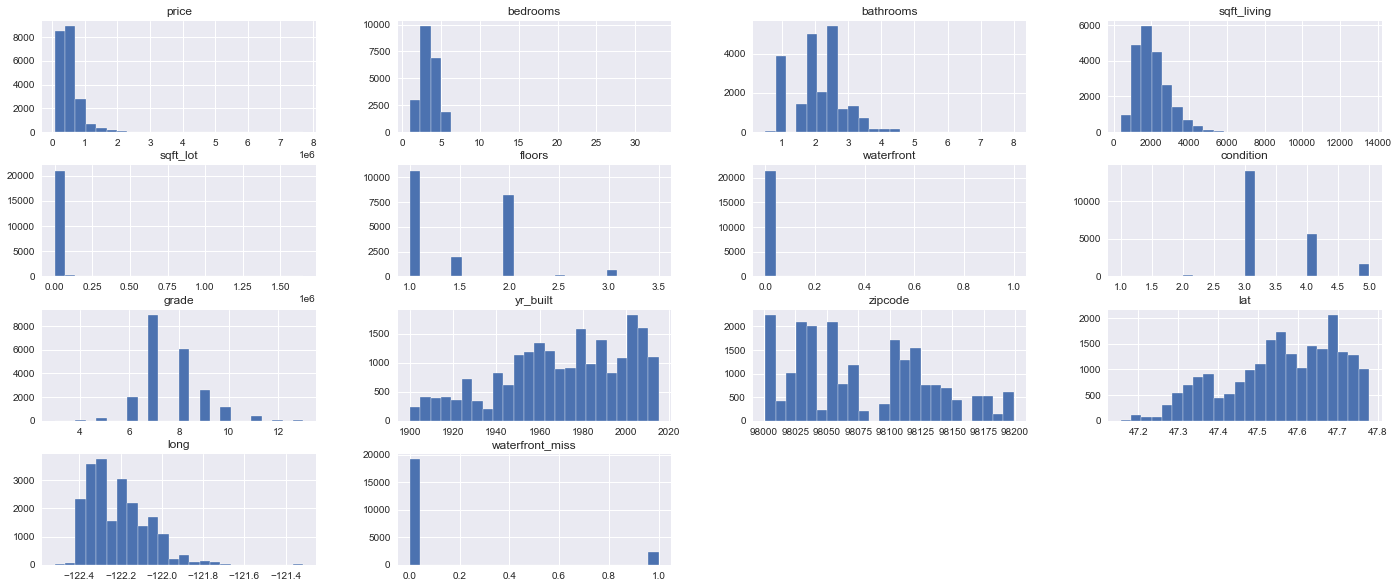

In [198]:
#plotting histograms to visualize patterns in the data
df_cleaned.hist(figsize = (24,10), bins= 24)
plt.show()

## The relationship between Target and predictor variable

To examine and visualize the relationship between variables

In [199]:
#Checking the statistical summary of price column
df_cleaned['price'].describe()

count     21593.000000
mean     540307.305516
std      367397.065920
min       78000.000000
25%      322000.000000
50%      450000.000000
75%      645000.000000
max     7700000.000000
Name: price, dtype: float64

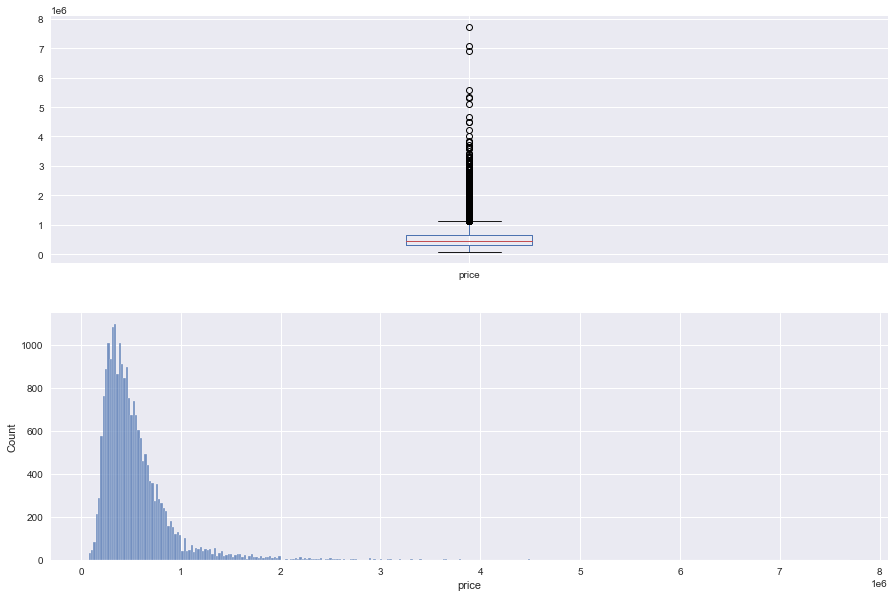

In [200]:
# creating two plots to visualize the distribution of a 'price' column in the cleaned Dataframe
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1 = df_cleaned['price'].plot.box()
ax2 = fig.add_subplot(212)
ax2 = sns.histplot(data=df_cleaned, x='price')

In [201]:
# Calculate the mean, median, and mode and the max_price
# Calculate the mean
mean_price = df_cleaned['price'].mean()

# Calculate the median
median_price = df_cleaned['price'].median()

# Calculate the mode
mode_price = df_cleaned['price'].mode()
# Calculate Maximum price 
max_price = df_cleaned['price'].max()

print(f"The maximum price is: {max_price}")
print(f"The mean price is: {mean_price}")
print(f"The median price is: {median_price}")
print(f"The mode price is: {mode_price}")

The maximum price is: 7700000.0
The mean price is: 540307.3055156764
The median price is: 450000.0
The mode price is: 0   350000.000000
1   450000.000000
dtype: float64


**Comments**
- Observations: The Price data is heavily skewed because it is apparent there are many outliers. The average price of a house in King County is 540k while the median price is 450k which can be associated with affordability and the Middle class members of the society. the highest priced house/home is at $7.7 Million which is significaqntly higher compared to the average price
* Action: Remove the Outliers in the price field/column because most clients of the expected clients are middle class hence the target clients for all investors. 

In [202]:
df_new = df_cleaned[(df_cleaned.price < df_cleaned.price.quantile(0.995)) & (df_cleaned.price > df_cleaned.price.quantile(.005))].copy()
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,waterfront_miss
0,221900.000000,3,1.000000,1180,5650,1.000000,0.000000,3,7,1955,98178,47.511200,-122.257000,1
1,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,3,7,1951,98125,47.721000,-122.319000,0
2,180000.000000,2,1.000000,770,10000,1.000000,0.000000,3,6,1933,98028,47.737900,-122.233000,0
3,604000.000000,4,3.000000,1960,5000,1.000000,0.000000,5,7,1965,98136,47.520800,-122.393000,0
4,510000.000000,3,2.000000,1680,8080,1.000000,0.000000,3,8,1987,98074,47.616800,-122.045000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.000000,3,2.500000,1530,1131,3.000000,0.000000,3,8,2009,98103,47.699300,-122.346000,0
21593,400000.000000,4,2.500000,2310,5813,2.000000,0.000000,3,8,2014,98146,47.510700,-122.362000,0
21594,402101.000000,2,0.750000,1020,1350,2.000000,0.000000,3,7,2009,98144,47.594400,-122.299000,0
21595,400000.000000,3,2.500000,1600,2388,2.000000,0.000000,3,8,2004,98027,47.534500,-122.069000,1


In [203]:
df_filtered= df_new

Removed outliers from the price column using quantile

### Analyzing Grade

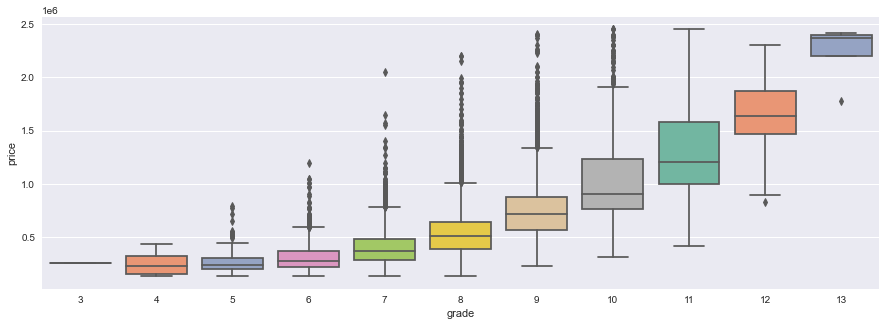

In [204]:
#Price vs Grade
# Creating the boxplot with a different color palette
plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='price', data=df_filtered, palette='Set2')

# Showing the plot
plt.show()

There's relationship between price and grade. The higher the grade, the higher the price.

### Analyzing square foot living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

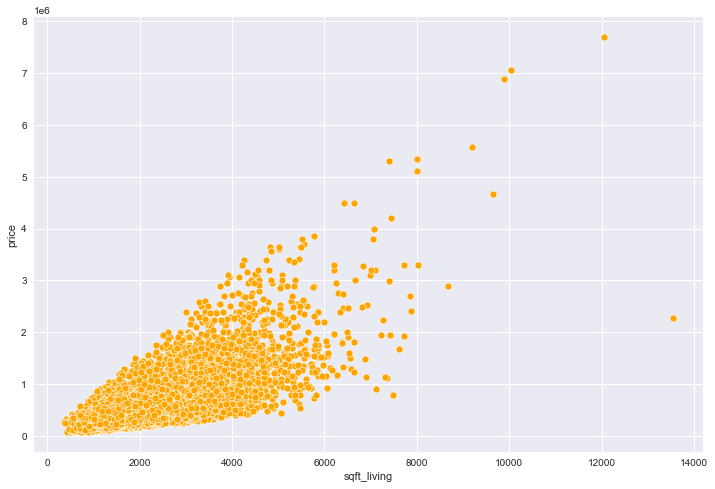

In [205]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='sqft_living',y='price',data=df,color= 'orange')

From the graph we can tell that sqft_living is positively correlated to price. It helps conclude that a higher sqft_living results in a higher price.

### Analyzing Number of Bathrooms

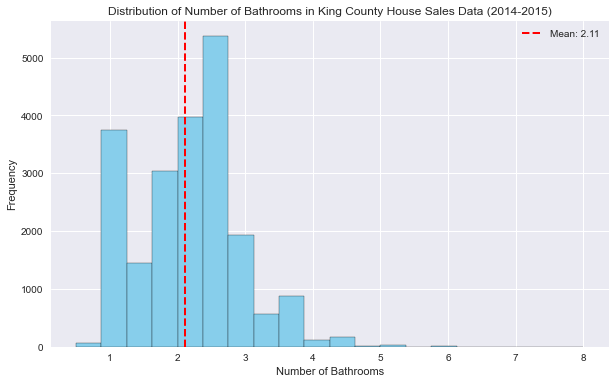

In [206]:
bathrooms= df_filtered['bathrooms']

#mean
mean_bathrooms =  bathrooms.mean()
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(bathrooms, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms in King County House Sales Data (2014-2015)')
plt.grid(True)

# Add a vertical line at the mean
plt.axvline(mean_bathrooms, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_bathrooms:.2f}')

# Show the histogram
plt.legend()
plt.show()

Based on this values, the peak(mode) of the data is around 2.5. Most houses have 2-3 bathrooms.
This distribution does not have outliers.
Based on the mean and the mode, the estimate gives a point for where the center of the data is located.

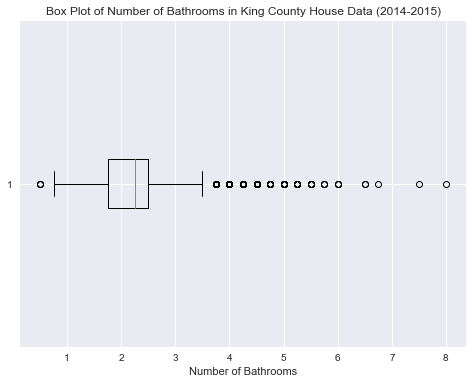

In [207]:
plt.figure(figsize=(8, 6))
plt.boxplot(bathrooms,vert= False)  # vert=False for a horizontal box plot
plt.xlabel('Number of Bathrooms')
plt.title('Box Plot of Number of Bathrooms in King County House Data (2014-2015)')
plt.grid(True)
plt.show()

The data indicates potential presence of outliers in the data that probably have affected the mean

In [208]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = bathrooms.quantile(0.25)
Q3 = bathrooms.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN in the original "bathrooms" column
df_filtered['bathrooms'][~((bathrooms >= lower_bound) & (bathrooms <= upper_bound))] = None

In [209]:
mean_bathrooms = df_filtered['bathrooms'].mean()
df_filtered['bathrooms'].fillna(mean_bathrooms, inplace=True)

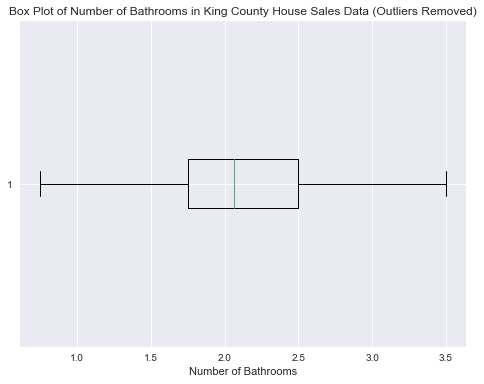

In [210]:
# confirming that outliers have been removed
# Create a box plot for the "bathrooms" column in the updated data
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['bathrooms'][df_filtered['bathrooms'].notna()], vert=False)  # vert=False for a horizontal box plot
plt.xlabel('Number of Bathrooms')
plt.title('Box Plot of Number of Bathrooms in King County House Sales Data (Outliers Removed)')
plt.grid(True)
plt.show()

In [211]:
df_filtered['bathrooms'].value_counts()

2.500000    5370
1.000000    3756
1.750000    3045
2.250000    2046
2.000000    1927
1.500000    1443
2.750000    1184
3.000000     744
3.500000     722
3.250000     571
2.062183     495
0.750000      65
1.250000       9
Name: bathrooms, dtype: int64

Most houses in our dataset have 2 bathrooms

### Analyzing Condition

#### How does the feature 'Condition' impact house price?

For this question, we will be exploring the relationship between the condition rating and house prices. We aim to determine whether houses with different condition rating exhibit varying price trends. This investigation will provide valuable insights into the impacts of condition on the housing market, potentially influencing pricing strategies and buyer preferences.

In [212]:
# We use the value_counts method to visualize the frequencies of the ratings
# We see that despite dropping the records with outliers in the price column, the distribution of ratings has not significantly changed
df = df_filtered
df['condition'].value_counts().to_frame()

,condition
3,13883
4,5628
5,1686
2,157
1,23


Next, we use a histogram to further enhance our visualization of how these ratings are distributed.

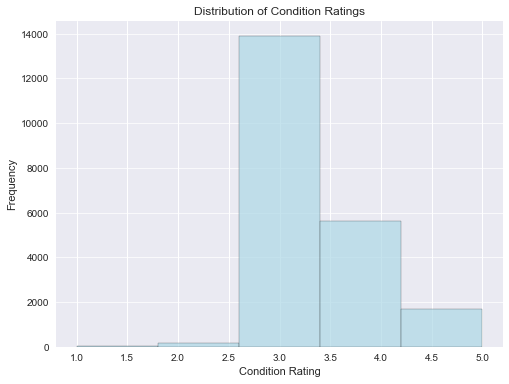

In [213]:
# Plot a histogram to show the distribution of the condition column
plt.figure(figsize=(8, 6)) 
num_bins = 5
plt.hist(df['condition'], bins=num_bins, color='lightblue', alpha=0.7, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Condition Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Condition Ratings')

plt.show();

Since the feature condition represents quality ratings, our histogram visualization reveals key insights about the quality distribution within the dataset. 

We observe that a significant portion of the houses are rated as "average". This suggests that "average" quality is the prevailing condition of most houses in our dataset. 

It is also important to note that there are house with ratings above and below average implying that we have a variability in quality.

### Analyzing Bedrooms

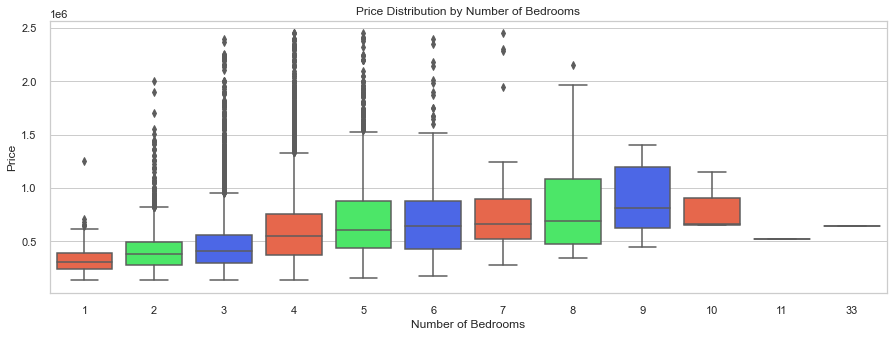

In [214]:
##Price vs Bedrooms
# Seting the style for the boxplot
sns.set(style="whitegrid")
# Defining the custom colors
boxplot_colors = ["#FF5733", "#33FF57", "#3357FF"]
# Create the boxplot with custom colors
plt.figure(figsize=(15, 5))
sns.boxplot(x='bedrooms', y='price', data=df_filtered, palette=boxplot_colors)
# Add a title
plt.title("Price Distribution by Number of Bedrooms")

# Customize the axis labels
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

plt.show()

In [215]:
#Replacing the outlier with the mean
df_filtered.loc[(df_filtered.bedrooms == 33), 'bedrooms'] = 3
df_filtered['bedrooms'].value_counts()

3     9777
4     6836
2     2699
5     1560
6      265
1      182
7       36
8       12
9        6
10       3
11       1
Name: bedrooms, dtype: int64

The mode of the bedroom column is 3, which means most houses haveof 3 bedrooms.

### Correlation Matrix

Using a heatmap to find out the correlation between the variables of this data set

In [216]:
# Finding out the correlation between the features
df_filtered.corr()['price']

price              1.000000
bedrooms           0.316654
bathrooms          0.408435
sqft_living        0.682378
sqft_lot           0.098745
floors             0.271005
waterfront         0.164017
condition          0.035434
grade              0.678498
yr_built           0.053203
zipcode           -0.045708
lat                0.343698
long               0.031426
waterfront_miss   -0.002203
Name: price, dtype: float64

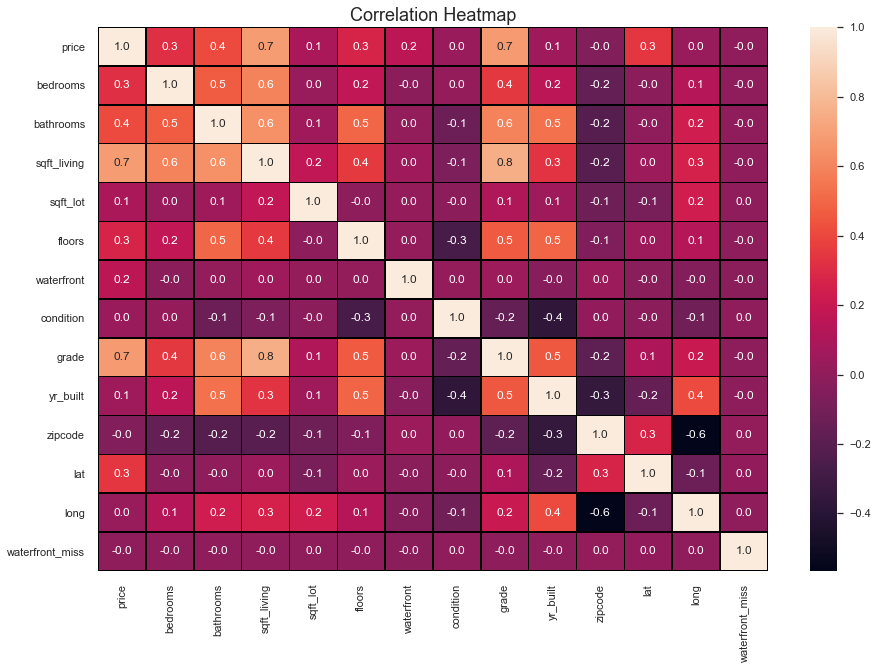

In [217]:
# Plotting a correlation heatmap using seaborn. Border the squares with black color, show the correlation index and round it up.
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(df_filtered.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='1.1f')

# Give a title to the map and display it.
plt.title('Correlation Heatmap', size=18)
plt.show()

## MODELLING

## Regression Analysis:

We will focus specifically on a subset of the overall dataset to perform our regression analysis. Regression analysis will allow us to quantify the extent to which these features affect house prices and provide a predictive model for pricing. 

The features considered are those that are highly correlated with our target price 'price' as seen from our correlation matrix and correlation heatmap.
They include: sqft_living, 
              bathrooms,bedrooms, , sqft_lot, waterfront, grade,floors,condition.

In [218]:
df_subset = df_filtered[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'waterfront', 'grade','floors','condition','price']]
df_subset 

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,floors,condition,price
0,3,1.000000,1180,5650,0.000000,7,1.000000,3,221900.000000
1,3,2.250000,2570,7242,0.000000,7,2.000000,3,538000.000000
2,2,1.000000,770,10000,0.000000,6,1.000000,3,180000.000000
3,4,3.000000,1960,5000,0.000000,7,1.000000,5,604000.000000
4,3,2.000000,1680,8080,0.000000,8,1.000000,3,510000.000000
...,...,...,...,...,...,...,...,...,...
21592,3,2.500000,1530,1131,0.000000,8,3.000000,3,360000.000000
21593,4,2.500000,2310,5813,0.000000,8,2.000000,3,400000.000000
21594,2,0.750000,1020,1350,0.000000,7,2.000000,3,402101.000000
21595,3,2.500000,1600,2388,0.000000,8,2.000000,3,400000.000000


### Step 1: Visualization relationship between features and target

For each feature, we create a scatter plot showing features on the x-axis and the target on the y-axis.

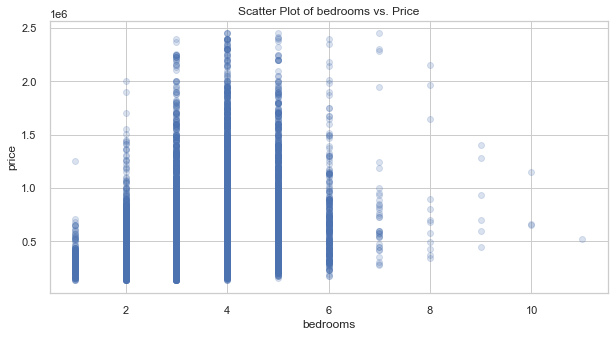

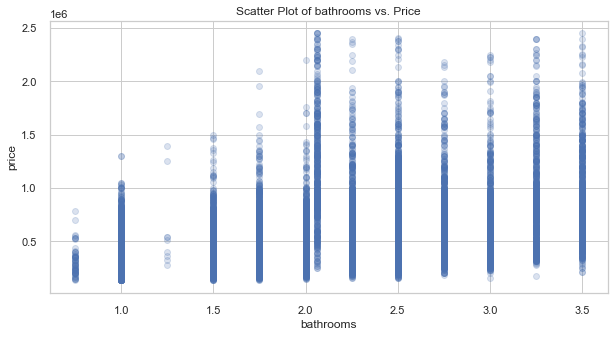

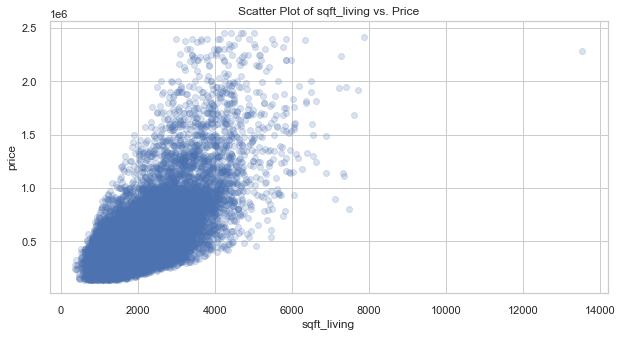

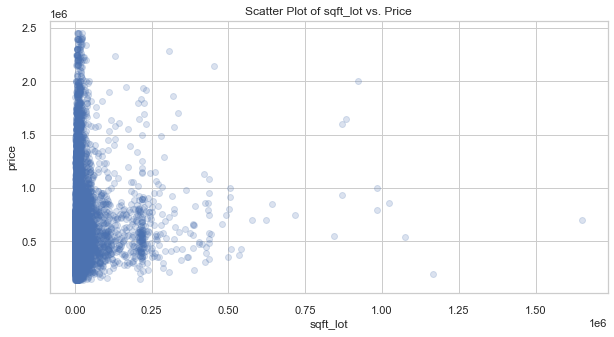

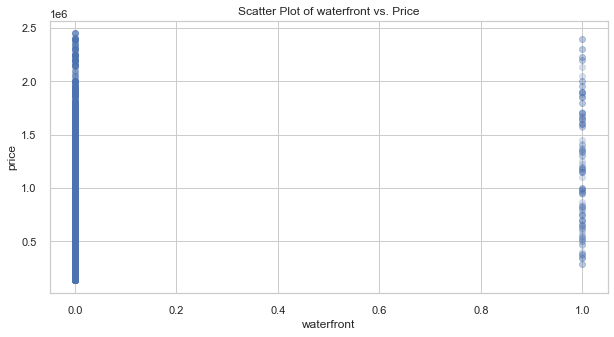

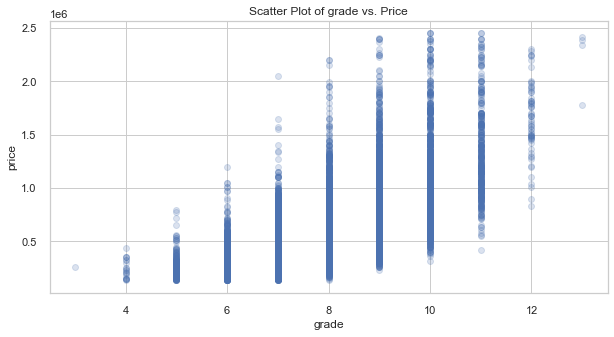

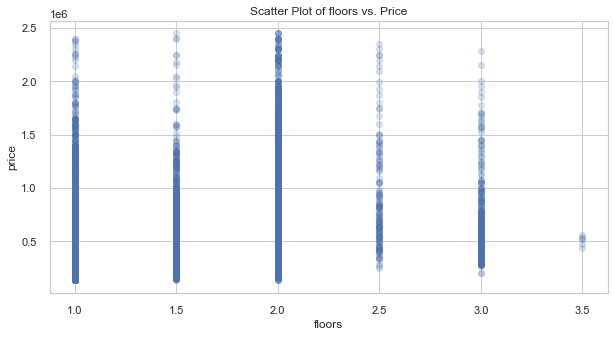

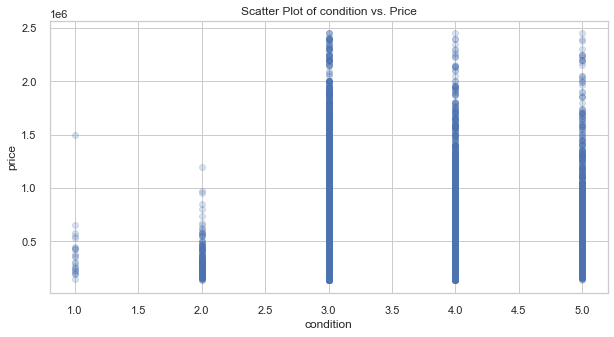

In [219]:
# Plotting Scatter plot
#fig, axes = plt.subplots(ncols=4,nrows =2, figsize=(20,5))
#axes[0].set_ylabel("price")
num_plots = len(df_subset.columns) - 1  # Subtract 1 to exclude "price"

for i, col in enumerate(df_subset.drop("price", axis=1).columns):
    plt.figure(figsize=(10, 5))
    plt.scatter(df_subset[col], df_subset["price"], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel("price")
    plt.title(f'Scatter Plot of {col} vs. Price')

    # Display each scatter plot
    plt.show()


The sqft_living feature seems to have the highest correlation with price


### Step 2: Build a simple Linear Model

In [220]:
# Explore the relationship to find our starting point
df_subset.corr()['price'].to_frame()

,price
bedrooms,0.316654
bathrooms,0.408435
sqft_living,0.682378
sqft_lot,0.098745
waterfront,0.164017
grade,0.678498
floors,0.271005
condition,0.035434
price,1.000000


In [221]:
y = df_subset["price"]

#sqft_living has the highest correlation of the 8 features
X_baseline = df_subset[["sqft_living"]]

In [222]:
from scipy import stats 
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.863e+04
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:45:15   Log-Likelihood:            -2.9379e+05
No. Observations:               21377   AIC:                         5.876e+05
Df Residuals:                   21375   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.396e+04   3940.225      8.618      

 price^= 3.396e+04 + 239.2436sqft_living

Our model is statistically significant overall and explains about 47% of the variation in the house prices
Both our intercept and coefficient for grade are statistically significant

The sqft_living coefficient is about 239. it suggests that as the living space increases, the house price tends to increase by $239 per square foot





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


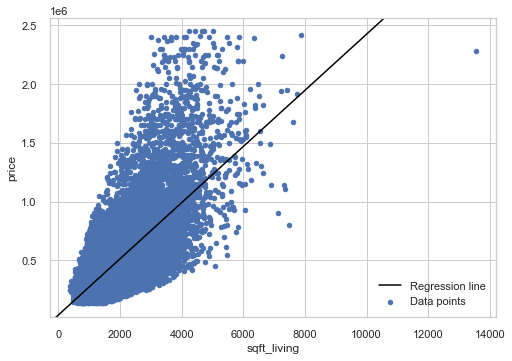

In [223]:
#plotting the regression line
fig, ax = plt.subplots()
df_filtered.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

In [224]:
bm_score1 = baseline_results.rsquared_adj
bm_score1

0.46561507299674776

In [225]:
#Split the data into training and test sets. Use the default split size
X_baseline_train, X_baseline_test, y_baseline_train, y_baseline_test = train_test_split(X_baseline, y, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_baseline_train), len(X_baseline_test), len(y_baseline_train), len(y_baseline_test))

16032 5345 16032 5345


In [226]:
# y-intercept
X_baseline_train_bm_score1 = sm.add_constant(X_baseline_train)
X_baseline_test_bm_score1 = sm.add_constant(X_baseline_test)

In [227]:
# Calculate predictions on training and test sets
y_baseline_hat_train = baseline_results.predict(X_baseline_train_bm_score1)
y_baseline_hat_test = baseline_results.predict(X_baseline_test_bm_score1) 

In [228]:
# Calculate training and test residuals
train_baseline_residuals = y_baseline_hat_train - y_baseline_train
test_residuals = y_baseline_hat_test - y_baseline_test

In [229]:
# Calculate training and test MSE
train_baseline_mse = mean_squared_error(y_baseline_train, y_baseline_hat_train)
test_baseline_mse = mean_squared_error(y_baseline_test, y_baseline_hat_test)
print('Train Mean Squarred Error of baseline model:',train_baseline_mse )
print('Test Mean Squarred Error of baseline model:', test_baseline_mse)

Train Mean Squarred Error of baseline model: 50975099105.935196
Test Mean Squarred Error of baseline model: 49698669628.592964


## Modeling 

In [230]:
x_cols = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'waterfront', 'grade','floors','condition']
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'grade',
 'floors',
 'condition']

**Split Data into Training and Test Sets**

In [231]:
X = df_filtered[x_cols]
y = df_filtered['price']

In [232]:
# Split the data into training and test sets. Use the default split size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16032 5345 16032 5345


In [233]:
# y-intercept
X_train_bm = sm.add_constant(X_train)
X_test_bm = sm.add_constant(X_test)

In [234]:
# Create the model with fit_intercept=True to include the intercept
model_m2 = sm.OLS(y_train, sm.add_constant(X_train_bm))
results_m2 = model_m2.fit()
print(results_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2672.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:45:18   Log-Likelihood:            -2.1861e+05
No. Observations:               16032   AIC:                         4.372e+05
Df Residuals:                   16023   BIC:                         4.373e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.049e+05   1.78e+04    -39.528      

**Comment**

price^ = -7.049e+05 -2.42e+04bedrooms -4.572e+04bathrooms + 168.7845sqft_living -0.2228sqft_lot +-0.2228waterfront + -0.2228grade + 3450.2247floors + 5.933e+04condition

* The R-squared value (0.572) is a measure of how well the independent variables(predictors) explain the variance in the          dependent variable(price).
* In this case, it indicates that approximately 57.2% of the variance in the "price" can be explained by the independent          variables included in the model.

The F-statistic of 2672 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

In order to make the negative intercept more interpretable, we apply zero centering to the model.

In [235]:
X_centered = X.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade,floors,condition
count,21377.000000,21377.000000,21377.000000,21377.000000,21377.000000,21377.000000,21377.000000,21377.000000
mean,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
std,0.897779,0.674673,878.199875,41602.135432,0.072515,1.142286,0.539395,0.648902
min,-2.372222,-1.312183,-1699.068485,-14578.864808,-0.005286,-4.650232,-0.494246,-2.411517
25%,-0.372222,-0.312183,-639.068485,-10064.864808,-0.005286,-0.650232,-0.494246,-0.411517
50%,-0.372222,0.000000,-159.068485,-7498.864808,-0.005286,-0.650232,0.005754,-0.411517
75%,0.627778,0.437817,470.931515,-4490.864808,-0.005286,0.349768,0.505754,0.588483
max,7.627778,1.437817,11470.931515,1636260.135192,0.994714,5.349768,2.005754,1.588483


In [236]:
centered_model = sm.OLS(y, sm.add_constant(X_centered))
centered_results = centered_model.fit()

print(f"""
Centered model adjusted R-Squared: {centered_results.rsquared_adj}
""")


Centered model adjusted R-Squared: 0.570433432986666



In [237]:
centered_results.params

const         528969.864574
bedrooms      -22893.608871
bathrooms     -47599.050717
sqft_living      168.615619
sqft_lot          -0.201913
waterfront    517979.386565
grade         112428.499070
floors          3232.447418
condition      57608.907685
dtype: float64

For a house with an average number of bedrooms, bathrooms, sqft_living,  area, sqft_lot area, waterfront, grade, floors and condition we would expect the price to be around $528969

## Model Evaluation

**Check For Normality**

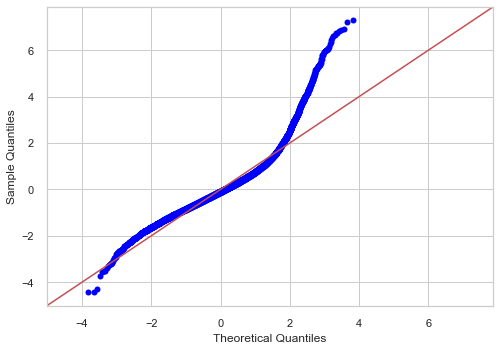

In [238]:
# Checking that the residuals are normally distributed
# Modify line color to orange and thickness
fig = sm.graphics.qqplot(results_m2.resid, dist=stats.norm, line='45', fit=True);
# Getting the axes and modify the line color and thickness
ax = fig.get_axes()[0]
ax.get_lines()[0].set_color('Orange')  # Set line color to orange
ax.get_lines()[0].set_linewidth(2)  # Set line thickness to 2

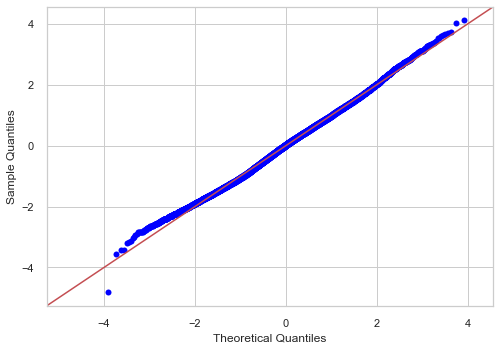

In [239]:
# Build log transformed model
y_log = np.log(y)
model = sm.OLS(y_log,  sm.add_constant(X)).fit()

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Getting the axes and modify the line color and thickness
ax = fig.get_axes()[0]
ax.get_lines()[0].set_color('Orange')  # Set line color to orange
ax.get_lines()[0].set_linewidth(2)  # Set line thickness to 2

# Show the QQ plot
plt.show()


In [240]:
log_results = model.summary()
print (log_results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3276.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:45:20   Log-Likelihood:                -7002.8
No. Observations:               21377   AIC:                         1.402e+04
Df Residuals:                   21368   BIC:                         1.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9038      0.026    422.859      

The R-squared value indicates that approximately 55% of the variance in the "price" can be explained by the independent    variables included in the modelafter log transformation.


The F-statistic of 3276 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

**Comment**

* Normality Assumption: the points in the QQ-normal plot lie on a straight diagonal line and the deviations from the straight line are minimal. 
* This is a confirmation that this is a normal distribution.

In [241]:
bm_log_score = model.rsquared_adj
bm_log_score

0.5507102800664527

In [242]:
# Split the data into training and test sets. Use the default split size
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y_log, random_state = 42, shuffle = True)
# A brief preview of our train test split
print(len(X_log_train), len(X_log_test), len(y_log_train), len(y_log_test))

16032 5345 16032 5345


In [243]:
# y-intercept
X_log_train_bm = sm.add_constant(X_log_train)
X_test_log_bm = sm.add_constant(X_log_test)

In [244]:
# Calculate predictions on training and test sets
y_log_hat_train = model.predict(X_log_train_bm)
y_log_hat_test = model.predict(X_test_log_bm) 

In [245]:
# Calculate training and test residuals
train_log_residuals = y_log_hat_train - y_log_train
test_log_residuals = y_log_hat_test - y_log_test

In [246]:
# Calculate training and test MSE
train_log_mse = mean_squared_error(y_log_train, y_log_hat_train)
test_log_mse = mean_squared_error(y_log_test, y_log_hat_test)
print('Train Mean Squarred Error of log transformed model:',train_log_mse )
print('Test Mean Squarred Error of log transformed model:', test_log_mse)

Train Mean Squarred Error of log transformed model: 0.11317968205719839
Test Mean Squarred Error of log transformed model: 0.11140492183570522


**Checking for Homescedasticity**

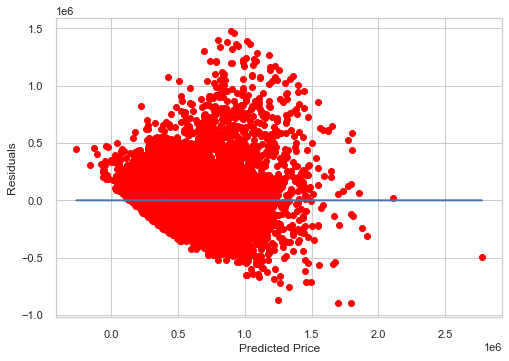

In [247]:
# Check that the residuals are homoscedastic
plt.scatter(results_m2.predict(X_train_bm), results_m2.resid, color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.plot(results_m2.predict(X_train_bm), [0 for i in range(len(X_train_bm))]);

**Comment**
* The data is a little heretoscedastic, but not too much. 
* The points do not vary more widely around the regression line for larger values of the explanatory variable.

In [248]:
#Checking for heteroscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_goldfeldquandt(y, X.values, alternative='two-sided')

(1.0505779744217376, 0.010791092222384824, 'two-sided')

If the p-value is 0.010791092222384824which is greater than 0.05,therefore we fail to reject the null hypothesis, suggesting that there is no strong evidence of heteroscedasticity.

**Model2(m2) Validation**

In [249]:
bm_score = results_m2.rsquared_adj
bm_score

0.5713823035892265

In [250]:
# Calculate predictions on training and test sets
y_hat_train = results_m2.predict(X_train_bm)
y_hat_test = results_m2.predict(X_test_bm) 

In [251]:
# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [252]:
# Calculate training and test MSE
train_mse_m2 = mean_squared_error(y_train, y_hat_train)
test_mse_m2 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error of Model_m2:', train_mse_m2)
print('Test Mean Squarred Error of Model_m2:', test_mse_m2)

Train Mean Squarred Error of Model_m2: 40898334241.93827
Test Mean Squarred Error of Model_m2: 40148058856.987465


In [253]:
X = x_cols

In [254]:
X = df_filtered[x_cols]
y = df_filtered['price'] 

**Summary Table**

In [255]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[bm_score1, bm_score, bm_log_score],
              [train_baseline_mse, train_mse_m2, train_log_mse],
              [test_baseline_mse, test_mse_m2, test_log_mse]], 
             columns = ['Baseline Model', 'Model m2', 'log_results'],
             index = ['Adj R Squared', 'RMSE_train', 'RMSE_test'])

,Baseline Model,Model m2,log_results
Adj R Squared,0.465615,0.571382,0.550710
RMSE_train,50975099105.935196,40898334241.938271,0.113180
RMSE_test,49698669628.592964,40148058856.987465,0.111405


**Cross Validation of the log transformed Model**

In [256]:
linreg = LinearRegression()
linreg.fit(X_log_train, y_log_train)
mse = make_scorer(mean_squared_error)
cv_5_train = cross_val_score(linreg, X_log_train, y_log_train, cv=5, scoring=mse)
cv_5_test = cross_val_score(linreg, X_log_test, y_log_test, cv=5, scoring=mse)
cv_5_train_mean = cv_5_train.mean()
cv_5_test_mean = cv_5_test.mean()
print('Train cross validation score of Model 1:', cv_5_train_mean)
print('Test cross validation score of Model 1:', cv_5_test_mean)

Train cross validation score of Model 1: 0.11331577972900371
Test cross validation score of Model 1: 0.11191239845313403


In this case, it appears that the model's performance on the test data (test cross-validation score) is slightly better (lower MSE) than on the training data (train cross-validation score). This suggests that the model is performing reasonably well, and it's not exhibiting significant overfitting to the training data.

In [257]:
rmse = mean_squared_error(y_log, model.predict(sm.add_constant(X)), squared=False)
rmse

0.33576171570827235

Our RMSE suggests that the model's predictions are quite close to the actual prices, on average.

## CONCLUSION


From our data we can conclude that price is mainly determined by waterfront, sqft_living, grade.

Also, most houses have an average of 3 bedrooms.

For a house with an average number of bedrooms, bathrooms, sqft_living,  area, sqft_lot area, waterfront, grade, floors and condition we would expect the price to be aapproximately $528969. 

Most houses in our data are of average condition.





## RECOMMENDATIONS

1.  Implement a pricing strategy that considers factors such as the specific location along the waterfront and any unique features of the property. Different waterfront properties may command different price points. A higher price for houses with waterfront views provides an opportunity for real estate agencies to specialize and cater to a niche market
 
 2. Encourage sellers to invest in property improvements and maintenance to increase property value. Provide guidance on home staging and presentation to attract buyers since most of the house are of average condition.

 3. Larger living spaces (sqft_living) can command higher prices. Sellers of properties with spacious living areas should emphasize this feature in listings. Buyers should prioritize properties that offer the desired living space.

 4. Buyers interested in high-quality properties should prioritize those with a higher grade. Sellers should invest in improving the grade of their properties to increase market appeal.

## NEXT STEPS

1. Evaluate the limitations of multiple linear regression by comparing its performance with other regression models.

2. Supplementary data from the Kings County to further improve the model's precision.

3. More current and longer cover period data to reach a more accurate conclusion for homeowners' reference.

